## Loading of Stringer spontaneous data

includes some visualizations

In [1]:
#@title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [12]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [13]:
#@title Data loading
import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

In [14]:
print(dat['sresp'].shape)
print(dat['beh_svd_time'].shape)
print(len(dat['stat']))

(11983, 7018)
(7018, 1000)
11983


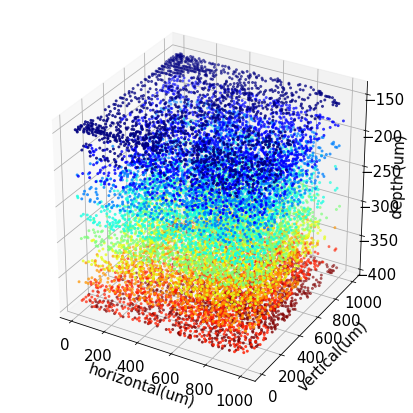

In [15]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)

xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])

ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');


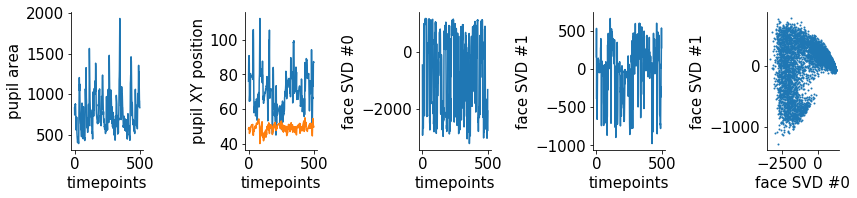

In [16]:
#@title Basic properties of behavioral data using plot and scatter
fig = plt.figure(figsize=(12,3))

ax = plt.subplot(1,5,1)
plt.plot(dat['pupilArea'][:500,0])
ax.set(xlabel='timepoints', ylabel = 'pupil area')

ax = plt.subplot(1,5,2)
plt.plot(dat['pupilCOM'][:500,:])
ax.set(xlabel='timepoints', ylabel = 'pupil XY position')

ax = plt.subplot(1,5,3)
plt.plot(dat['beh_svd_time'][:500,0])
ax.set(xlabel='timepoints', ylabel = 'face SVD #0')

ax = plt.subplot(1,5,4)
plt.plot(dat['beh_svd_time'][:500,1])
ax.set(xlabel='timepoints', ylabel = 'face SVD #1')

ax = plt.subplot(1,5,5)
plt.scatter(dat['beh_svd_time'][:,0], dat['beh_svd_time'][:,1], s = 1)
ax.set(xlabel='face SVD #0', ylabel = 'face SVD #1')

plt.show()

In [190]:
#@title take PCA after preparing data by z-score
from scipy.stats import zscore
from sklearn.decomposition import PCA 
Z = zscore(dat['sresp'], axis=1)
Z = np.nan_to_num(Z)
X = PCA(n_components = 200).fit_transform(Z)
# plt.plot(Z[0,:100])

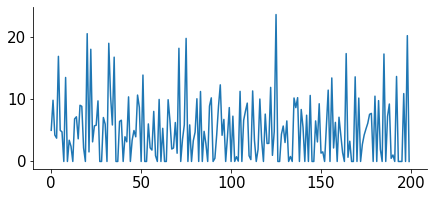

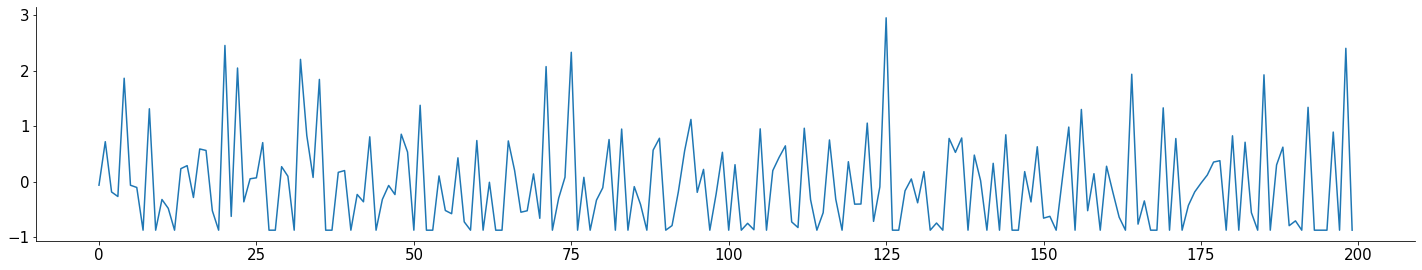

(array([2.655e+03, 6.760e+02, 6.580e+02, 6.380e+02, 5.610e+02, 4.650e+02,
        3.890e+02, 2.840e+02, 2.170e+02, 1.440e+02, 9.800e+01, 7.300e+01,
        4.600e+01, 4.500e+01, 1.600e+01, 1.200e+01, 8.000e+00, 6.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.8761554 , -0.6031163 , -0.33007714, -0.05703801,  0.21600111,
         0.48904023,  0.76207936,  1.0351185 ,  1.3081576 ,  1.5811967 ,
         1.8542359 ,  2.127275  ,  2.400314  ,  2.6733532 ,  2.9463923 ,
         3.2194314 ,  3.4924705 ,  3.7655096 ,  4.038549  ,  4.311588  ,
         4.584627  ,  4.857666  ,  5.1307054 ,  5.403744  ,  5.6767836 ,
         5.

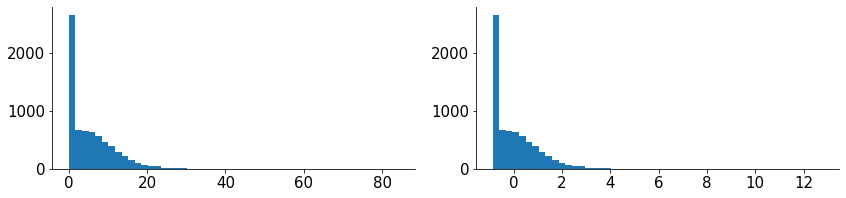

In [191]:
#@title compare raw response and z-scores
idx_neuron = 1
fig = plt.figure(figsize=(12,3))
fig.add_subplot(1,2,1)
plt.plot(dat['sresp'][idx_neuron,:200])
plt.show()

fig.add_subplot(1,2,2)
plt.plot(Z[idx_neuron,:200])
plt.show()

fig = plt.figure(figsize=(12,3))
fig.add_subplot(1,2,1)
plt.hist(dat['sresp'][idx_neuron,:], bins=50)

fig.add_subplot(1,2,2)
plt.hist(Z[idx_neuron,:], bins=50)


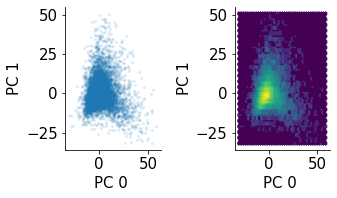

In [13]:
#@title Plot PCs. Too many points, switch to logarithmic hexbin! 
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(1,5,1)
plt.scatter(X[:,0], X[:,1], s = 4, alpha = .1)
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1');

ax = plt.subplot(1,5,2)
plt.hexbin(X[:,0], X[:,1], gridsize = 40, bins = 'log')
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1', alpha = .1);

In [17]:
# import libraries
from sklearn.decomposition import NMF


In [24]:
# helper functions
def my_nmf(DataMat, nComp = 2):
    # data matrix input for NMF: nSamples * nFeatures
    
    DataMat[DataMat<0]=0 #set any negligibly small negative values to 0
    params = {'nComp': nComp}
    model = NMF(n_components = params['nComp'], init='random')
    W = model.fit_transform(DataMat)
    H = model.components_
    
    return W, H

def select_cell(weights, perc = 0):
    '''idx, plot_colors = select_cell(H[0,:], perc = 0)'''
    # print(cmap[:100,:])
    weights = np.array(weights)
    weights = (weights - np.min(weights))/(np.max(weights) - np.min(weights))
    # print(np.ptp(weights))

    # set colormap as neuron's weights
    cmap = cm.get_cmap('binary')(weights)

    idx = np.where(weights > np.percentile(weights, perc)) # index of neurons to be plotted
    idx = np.array(idx)
#     idx = idx[0,:]
    plot_colors = cmap[idx[0,:],:]
    
    return idx, plot_colors


In [22]:
idx, plot_colors = select_cell(H[0,:], perc = 90)

In [97]:
# take NMF
DataMat =  dat['sresp'].T
print(np.min(DataMat))

# DataMat_min = np.min(Z.T, axis = 0)
# DataMat = Z.T - DataMat_min

# print(DataMat.shape)
# print(np.min(DataMat, axis = 0))

nComp = 3
W, H = my_nmf(DataMat, nComp = nComp)
# weights for factors (W and H)
# W: nNeuron * nComp, H: nComp * nTime
print(f'W size is {W.shape}')
print(f'H size is {H.shape}')

0.0
W size is (7018, 3)
H size is (3, 11983)


<Figure size 1080x216 with 0 Axes>

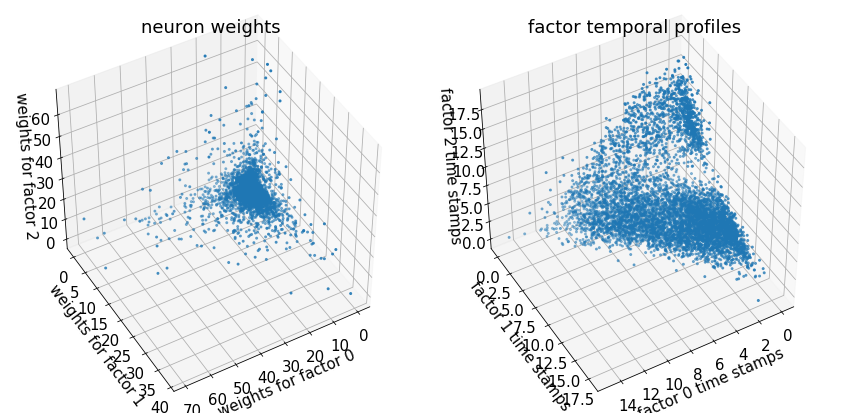

In [33]:
# view factors
# select 2 dimensions to view
dim1 = 0
dim2 = 1
ViewDim = 3

fig = plt.figure(figsize=(15,3))
if ViewDim == 2:
  ax = plt.subplot(1,5,1)
  plt.hexbin(H[dim1,:], H[dim2,:], gridsize = 40, bins = 'log')
  ax.set(xlabel = 'weights for factor ' + str(dim1), ylabel =  'weights for factor ' + str(dim2), alpha = .1);

  ax = plt.subplot(1,5,2)
  plt.hexbin(W[:,dim1], W[:,dim2], gridsize = 40, bins = 'log')
  ax.set(xlabel = 'factor '+str(dim1)+' time stamps', ylabel = 'factor '+str(dim2)+' time stamps', alpha = .1);
else:
  fig1 = plt.figure(figsize = (12, 6))
  ax = fig1.add_subplot(121, projection='3d')
  ax.scatter(H[0,:],H[1,:],H[2,:], 'o', s = 4)
  ax.set(xlabel='weights for factor 0', ylabel = 'weights for factor 1', 
         zlabel='weights for factor 2', title = 'neuron weights');
  # for angle in range(0, 360):
  ax.view_init(45, 60)
    # plt.draw()
    # plt.pause(0.01)

  ax = fig1.add_subplot(122, projection='3d')

  ax.scatter(W[:,0],W[:,1],W[:,2], 'o', s = 4)
  ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
         zlabel='factor 2 time stamps', title = 'factor temporal profiles');
  ax.view_init(45, 60)



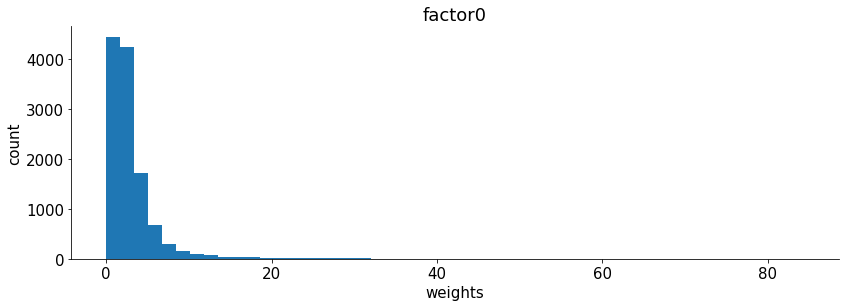

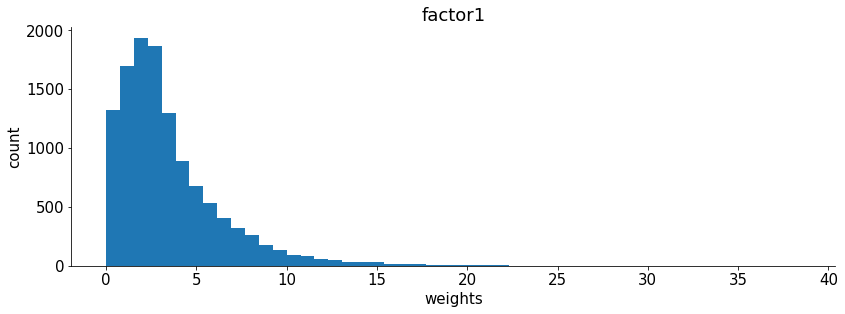

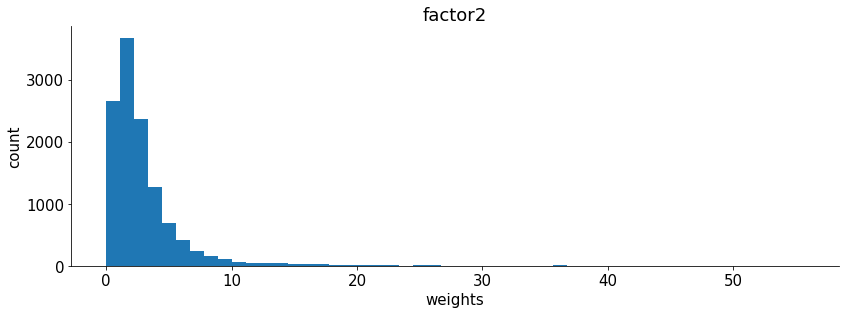

In [98]:
# visualize neuron components 
for i_fac in range(0,nComp):
    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(nComp, 1, i_fac+1)
    plt.hist(H[i_fac,:], bins = 50)
#     plt.hist(W[:,i_fac], bins = 50)
    ax.set(xlabel = 'weights', ylabel = 'count', title = 'factor'+np.str(i_fac))
#     ax.set(xlabel = 'factor amplitude', ylabel = 'count', title = 'factor'+np.str(i_fac))
    plt.show()


# fig = plt.figure()
# ax = fig.add_subplot(1, nComp, 1)
# plt.hist(H[0,:], bins = 50)
# # plt.xlabel = ('weights')
# # plt.ylabel = ('count')
# # plt.title = ('factor 1')
# ax.set(xlabel='weights', ylabel = 'count', title = 'factor 1')
# plt.show()



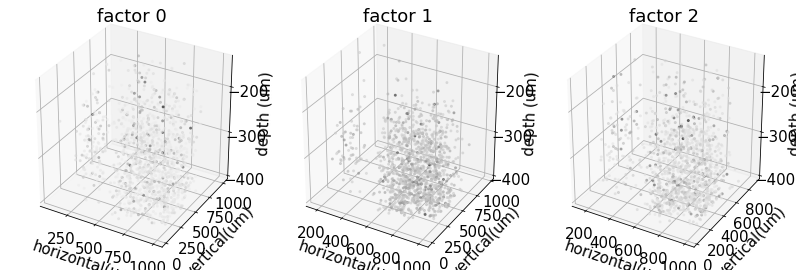

In [100]:
# plot neurons' weights in 3D
def plot_weights(idx, plot_colors):
    im = ax.scatter(x[idx],y[idx],z[idx], 'o', s = 4, c = plot_colors, alpha = 0.5)
    # im = ax.scatter(]x, y, z, 'o', s = 4, c = cmap, alpha = 0.2)
    ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)',
          title = 'factor '+np.str(i_fac));
    # ax.view_init(30, 45)
    return

fig = plt.figure(figsize=(15,4))
for i_fac in range(0,nComp):
    ax = fig.add_subplot(1, nComp+1, i_fac+1, projection='3d')
    idx, plot_colors = select_cell(H[i_fac,:], perc = 90)
    plot_weights(idx, plot_colors)


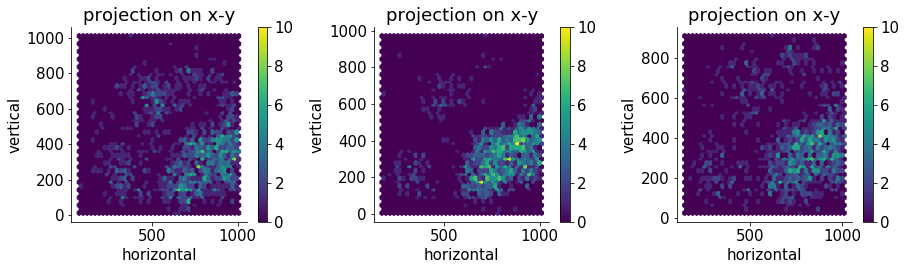

In [99]:
# neuron's projection onto x-y plane
# idx = np.arange(0, x.shape[0])
fig = plt.figure(figsize=(17,4))
for i_fac in range(0,3):
    ax = fig.add_subplot(1, nComp+1, i_fac+1)
    idx, plot_colors = select_cell(H[i_fac,:], perc = 90)
    im = plt.hexbin(x[idx], y[idx], gridsize = 40, vmin = 0, vmax = 10)
    ax.set(xlabel = 'horizontal', ylabel = 'vertical', title = 'projection on x-y', alpha = .1);
    fig.colorbar(im)

# fig = plt.figure(figsize=(17,4))
# for i_fac in range(0,nComp):
#     ax = fig.add_subplot(1, nComp+1, i_fac+1)
#     idx, plot_colors = select_cell(H[i_fac,:], perc = 90)
#     im = plt.hexbin(x[idx], z[idx], gridsize = 40, vmin = 0, vmax = 12)
#     ax.set(xlabel = 'horizontal', ylabel = 'vertical', title = 'projection on x-z', alpha = .1);
#     fig.colorbar(im)

    
# fig = plt.figure(figsize=(17,4))

# for i_fac in range(0,nComp):
#     ax = fig.add_subplot(1, nComp+1, i_fac+1)
#     idx, plot_colors = select_cell(H[i_fac,:], perc = 90)
#     plt.hexbin(y[idx], z[idx], gridsize = 40, vmin = 0, vmax = 12)
#     ax.set(xlabel = 'horizontal', ylabel = 'vertical', title = 'projection on y-z', alpha = .1);
#     fig.colorbar(im)
    


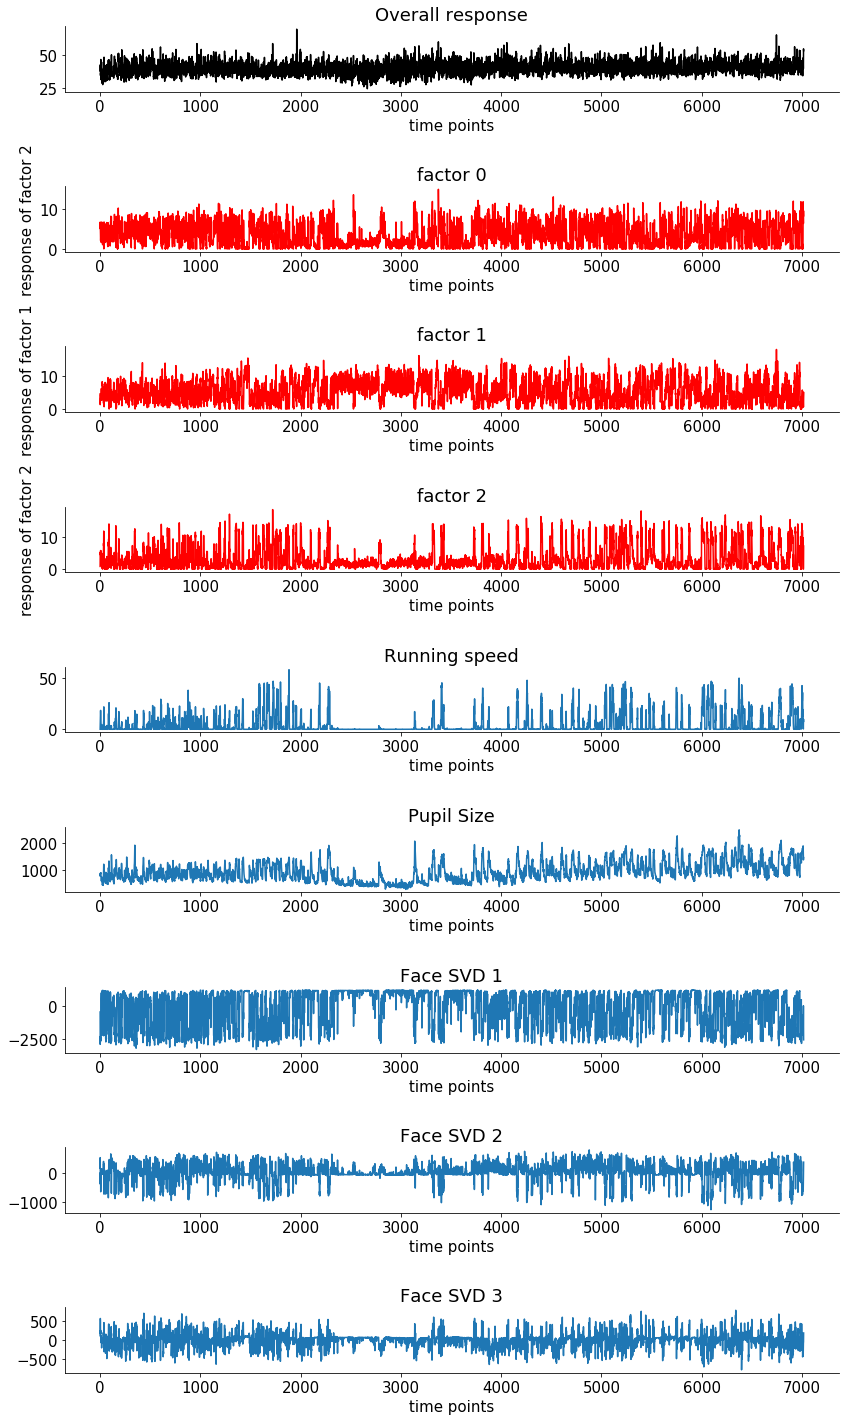

In [90]:
# visualize temporal components
fig = plt.figure(figsize=(12,20))
nSubplot = 9

ax = fig.add_subplot(nSubplot, 1, 1)
plt.plot(np.mean(dat['sresp'], axis=0), 'k')
ax.set(xlabel='time points', ylabel = '', title = 'Overall response');

ax = fig.add_subplot(nSubplot, 1, 2)
plt.plot(W[:,0],'r')
ax.set(xlabel='time points', ylabel = 'response of factor 2', title = 'factor 0');

ax = fig.add_subplot(nSubplot, 1, 3)
plt.plot(W[:,1],'r')
ax.set(xlabel='time points', ylabel = 'response of factor 1', title = 'factor 1');

ax = fig.add_subplot(nSubplot, 1, 4)
plt.plot(W[:,2],'r')
ax.set(xlabel='time points', ylabel = 'response of factor 2', title = 'factor 2');

ax = fig.add_subplot(nSubplot, 1, 5)
plt.plot(dat['run'])
ax.set(xlabel='time points', ylabel = '', title = 'Running speed');

ax = fig.add_subplot(nSubplot, 1, 6)
plt.plot(dat['pupilArea'])
ax.set(xlabel='time points', ylabel = '', title = 'Pupil Size');

ax = fig.add_subplot(nSubplot, 1, 7)
plt.plot(dat['beh_svd_time'][:,0])
ax.set(xlabel='time points', ylabel = '', title = 'Face SVD 1');

ax = fig.add_subplot(nSubplot, 1, 8)
plt.plot(dat['beh_svd_time'][:,1])
ax.set(xlabel='time points', ylabel = '', title = 'Face SVD 2');

ax = fig.add_subplot(nSubplot, 1, 9)
plt.plot(dat['beh_svd_time'][:,2])
ax.set(xlabel='time points', ylabel = '', title = 'Face SVD 3');



In [87]:
# correlation with behavior
print(dat['run'][:,0].shape)
print(W[:,0].shape)

# np.corrcoef(W[:,0], dat['run'][:,0])[0,1]
print('Correlation Coefficient between FACTOR 0 and RUNNING SPEED is {}'.format(np.corrcoef(W[:,0], dat['run'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 1 and RUNNING SPEED is {}'.format(np.corrcoef(W[:,1], dat['run'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 2 and RUNNING SPEED is {}'.format(np.corrcoef(W[:,2], dat['run'][:,0])[0,1]))

print('Correlation Coefficient between FACTOR 0 and PUPIL SIZE is {}'.format(np.corrcoef(W[:,0], dat['pupilArea'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 1 and PUPIL SIZE is {}'.format(np.corrcoef(W[:,1], dat['pupilArea'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 2 and PUPIL SIZE is {}'.format(np.corrcoef(W[:,2], dat['pupilArea'][:,0])[0,1]))

print('Correlation Coefficient between FACTOR 0 and FACE SVD1 is {}'.format(np.corrcoef(W[:,0], dat['beh_svd_time'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 1 and FACE SVD1 is {}'.format(np.corrcoef(W[:,1], dat['beh_svd_time'][:,0])[0,1]))
print('Correlation Coefficient between FACTOR 2 and FACE SVD1 is {}'.format(np.corrcoef(W[:,2], dat['beh_svd_time'][:,0])[0,1]))


print('Correlation Coefficient between FACTOR 0 and FACE SVD2 is {}'.format(np.corrcoef(W[:,0], dat['beh_svd_time'][:,1])[0,1]))
print('Correlation Coefficient between FACTOR 1 and FACE SVD2 is {}'.format(np.corrcoef(W[:,1], dat['beh_svd_time'][:,1])[0,1]))
print('Correlation Coefficient between FACTOR 2 and FACE SVD2 is {}'.format(np.corrcoef(W[:,2], dat['beh_svd_time'][:,1])[0,1]))

print('Correlation Coefficient between FACTOR 0 and FACE SVD3 is {}'.format(np.corrcoef(W[:,0], dat['beh_svd_time'][:,2])[0,1]))
print('Correlation Coefficient between FACTOR 1 and FACE SVD3 is {}'.format(np.corrcoef(W[:,1], dat['beh_svd_time'][:,2])[0,1]))
print('Correlation Coefficient between FACTOR 2 and FACE SVD3 is {}'.format(np.corrcoef(W[:,2], dat['beh_svd_time'][:,2])[0,1]))



(7018,)
(7018,)
Correlation Coefficient between FACTOR 0 and RUNNING SPEED is -0.20465558017125451
Correlation Coefficient between FACTOR 1 and RUNNING SPEED is -0.40342014668113313
Correlation Coefficient between FACTOR 2 and RUNNING SPEED is 0.7524401088855305
Correlation Coefficient between FACTOR 0 and PUPIL SIZE is 0.21097029161383588
Correlation Coefficient between FACTOR 1 and PUPIL SIZE is -0.6497718402139521
Correlation Coefficient between FACTOR 2 and PUPIL SIZE is 0.6531281791615334
Correlation Coefficient between FACTOR 0 and FACE SVD1 is -0.40438444868096857
Correlation Coefficient between FACTOR 1 and FACE SVD1 is 0.7592496021703817
Correlation Coefficient between FACTOR 2 and FACE SVD1 is -0.6525952884338262
Correlation Coefficient between FACTOR 0 and FACE SVD2 is 0.37983676153294954
Correlation Coefficient between FACTOR 1 and FACE SVD2 is -0.06557026618227545
Correlation Coefficient between FACTOR 2 and FACE SVD2 is -0.3517309489907225
Correlation Coefficient between 

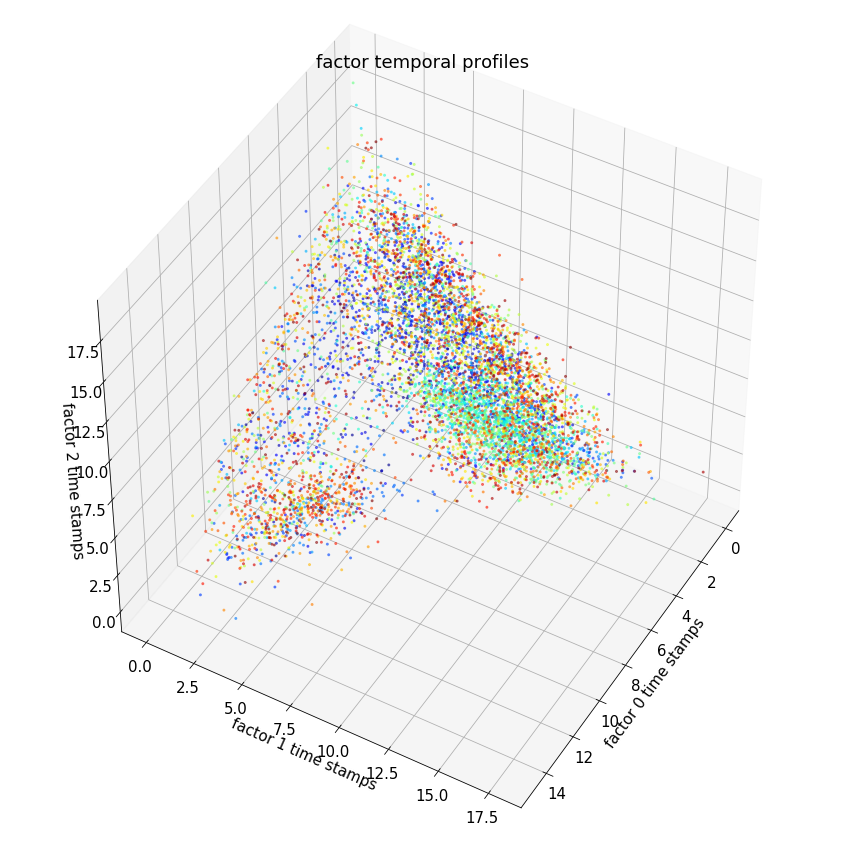

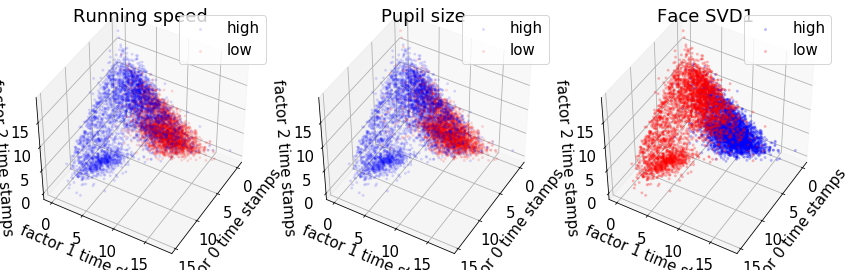

In [126]:
# visualize trajectory of overall activity by 3 factors
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
xc = np.linspace(0.0, 1.0, W.shape[0])
cmap = cm.get_cmap('jet')(xc)
ax.scatter(W[:,0],W[:,1],W[:,2], 'o', s = 4, c = cmap, alpha = 0.5)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'factor temporal profiles');
ax.view_init(45, 30)

fig = plt.figure(figsize=(12, 4))
beh_data = dat['run'][:,0]
idx_high = np.where(beh_data > np.percentile(beh_data, 50))
idx_low = np.where(beh_data <= np.percentile(beh_data, 50))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(W[idx_high,0],W[idx_high,1],W[idx_high,2], 'o', s = 4, c = 'b', alpha = 0.1)
ax.scatter(W[idx_low,0],W[idx_low,1],W[idx_low,2], 'o', s = 4, c = 'r', alpha = 0.1)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'Running speed');
ax.view_init(45, 30)
ax.legend(['high', 'low'])

beh_data = dat['pupilArea'][:,0]
idx_high = np.where(beh_data > np.percentile(beh_data, 50))
idx_low = np.where(beh_data <= np.percentile(beh_data, 50))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(W[idx_high,0],W[idx_high,1],W[idx_high,2], 'o', s = 4, c = 'b', alpha = 0.1)
ax.scatter(W[idx_low,0],W[idx_low,1],W[idx_low,2], 'o', s = 4, c = 'r', alpha = 0.1)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'Pupil size');
ax.view_init(45, 30)
ax.legend(['high', 'low'])

beh_data = dat['beh_svd_time'][:,0]
idx_high = np.where(beh_data > np.percentile(beh_data, 50))
idx_low = np.where(beh_data <= np.percentile(beh_data, 50))

ax = fig.add_subplot(133, projection='3d')
ax.scatter(W[idx_high,0],W[idx_high,1],W[idx_high,2], 'o', s = 4, c = 'b', alpha = 0.2)
ax.scatter(W[idx_low,0],W[idx_low,1],W[idx_low,2], 'o', s = 4, c = 'r', alpha = 0.2)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'Face SVD1');
ax.view_init(45, 30)
ax.legend(['high', 'low'])


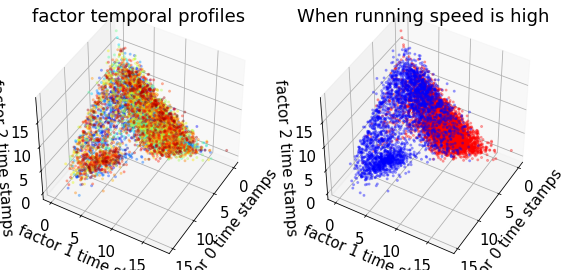

In [114]:
# visualize trajectory of overall activity by 3 factors
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
xc = np.linspace(0.0, 1.0, W.shape[0])
cmap = cm.get_cmap('jet')(xc)
ax.scatter(W[:,0],W[:,1],W[:,2], 'o', s = 4, c = cmap, alpha = 0.3)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'factor temporal profiles');
ax.view_init(45, 30)

beh_data = dat['pupilArea'][:,0]
idx_high = np.where(beh_data > np.percentile(beh_data, 60))
idx_low = np.where(beh_data <= np.percentile(beh_data, 60))

ax = fig.add_subplot(132, projection='3d')
ax.scatter(W[idx_high,0],W[idx_high,1],W[idx_high,2], 'o', s = 4, c = 'b', alpha = 0.3)
ax.scatter(W[idx_low,0],W[idx_low,1],W[idx_low,2], 'o', s = 4, c = 'r', alpha = 0.3)
ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
     zlabel='factor 2 time stamps', title = 'When running speed is high');
ax.view_init(45, 30)

# ax = fig.add_subplot(133, projection='3d')
# ax.scatter(W[idx_low,0],W[idx_low,1],W[idx_low,2], 'o', s = 4, c = 'r', alpha = 0.3)
# ax.set(xlabel='factor 0 time stamps', ylabel = 'factor 1 time stamps', 
#      zlabel='factor 2 time stamps', title = 'When running speed is low');
# ax.view_init(45, 30)


In [36]:
#@title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
!pip install umap-learn
from umap import UMAP
ncomp = 2 # try 2, then try 3
xinit = 1 * zscore(X[:,:ncomp], axis=0)
embed = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 20, 
             metric = 'correlation', transform_seed = 42).fit_transform(X)
             

ValueError: ignored

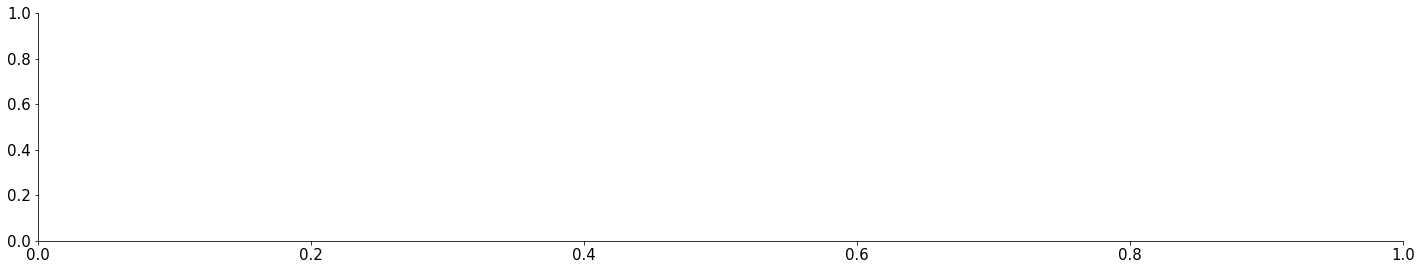

In [20]:
# @title [YG] draw UMAP results
import umap
data = Z
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)
    
draw_umap(n_components=1, title='n_components = 1')


In [37]:
from scipy.ndimage import uniform_filter1d
embed = embed.flatten()
isort = np.argsort(embed)
RasterMap = uniform_filter1d(Z[isort, :], size= 50, axis=0)
RasterMap = zscore(RasterMap[::10, :], axis = 1)

IndexError: ignored

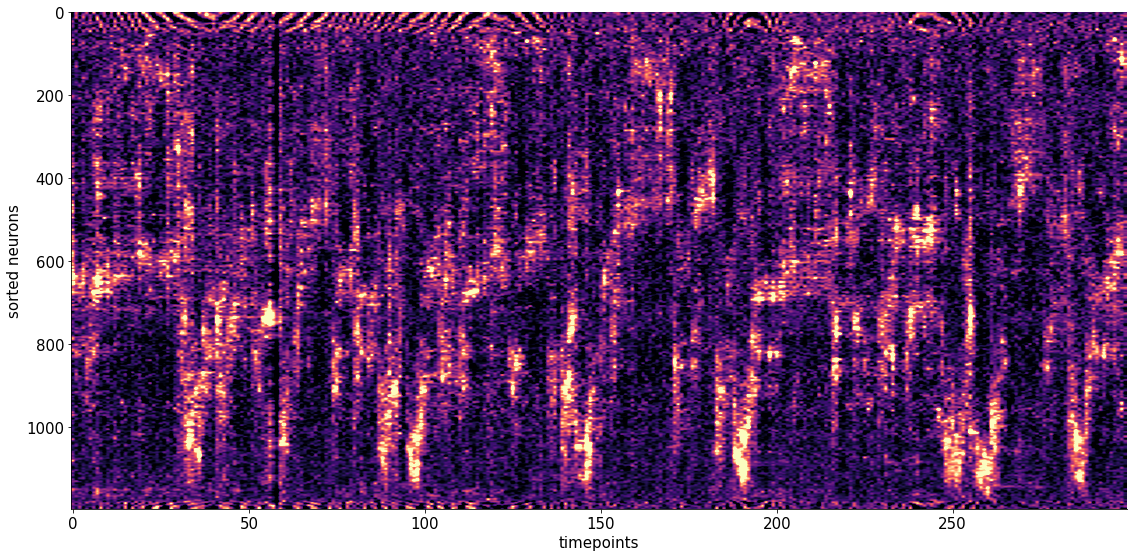

In [38]:
# now sort with UMAP both the neuron axis and the timepoints axis, bin the sorted matrix and make a sorted Rastermap picture 
plt.figure(figsize=(16,8))
ax = plt.subplot(111)
trange = np.arange(1100, 1400)
plt.imshow(RasterMap[:, trange], vmax= 3, vmin = -1, aspect = 'auto', cmap = 'magma')
ax.set(xlabel = 'timepoints', ylabel = 'sorted neurons');

In [23]:
#@title Helper functions for GLM

def plot_stim_and_spikes(stim, spikes, dt, nt=120):
  """Show time series of stim intensity and spike counts.

  Args:
    stim (1D array): vector of stimulus intensities
    spikes (1D array): vector of spike counts
    dt (number): duration of each time step
    nt (number): number of time steps to plot

  """
  timepoints = np.arange(120)
  time = timepoints * dt

  f, (ax_stim, ax_spikes) = plt.subplots(
    nrows=2, sharex=True, figsize=(8, 5),
  )
  ax_stim.plot(time, stim[timepoints])
  ax_stim.set_ylabel('Stimulus intensity')

  ax_spikes.plot(time, spikes[timepoints])
  ax_spikes.set_xlabel('Time (s)')
  ax_spikes.set_ylabel('Number of spikes')

  f.tight_layout()


def plot_glm_matrices(X, y, nt=50):
  """Show X and Y as heatmaps.
    
  Args:
    X (2D array): Design matrix.
    y (1D or 2D array): Target vector.

  """
  from matplotlib.colors import BoundaryNorm
  from mpl_toolkits.axes_grid1 import make_axes_locatable
  Y = np.c_[y]  # Ensure Y is 2D and skinny

  f, (ax_x, ax_y) = plt.subplots(
    ncols=2,
    figsize=(6, 8),
    sharey=True,
    gridspec_kw=dict(width_ratios=(5, 1)),
  )
  norm = BoundaryNorm([-1, -.2, .2, 1], 256)
  imx = ax_x.pcolormesh(X[:nt], cmap="coolwarm", norm=norm)
  
  ax_x.set(
    title="X\n(lagged stimulus)",
    xlabel="Time lag (time bins)",
    xticks=[4, 14, 24],
    xticklabels=['-20', '-10', '0'],
    ylabel="Time point (time bins)",
  )
  plt.setp(ax_x.spines.values(), visible=True)

  divx = make_axes_locatable(ax_x)
  caxx = divx.append_axes("right", size="5%", pad=0.1)
  cbarx = f.colorbar(imx, cax=caxx)
  cbarx.set_ticks([-.6, 0, .6])
  cbarx.set_ticklabels(np.sort(np.unique(X)))

  norm = BoundaryNorm(np.arange(y.max() + 1), 256)
  imy = ax_y.pcolormesh(Y[:nt], cmap="magma", norm=norm)
  ax_y.set(
    title="Y\n(spike count)",
    xticks=[]
  )
  ax_y.invert_yaxis()
  plt.setp(ax_y.spines.values(), visible=True)

  divy = make_axes_locatable(ax_y)
  caxy = divy.append_axes("right", size="30%", pad=0.1)
  cbary = f.colorbar(imy, cax=caxy)
  cbary.set_ticks(np.arange(y.max()) + .5)
  cbary.set_ticklabels(np.arange(y.max()))

def plot_spike_filter(theta, dt, **kws):
  """Plot estimated weights based on time lag model.

  Args:
    theta (1D array): Filter weights, not including DC term.
    dt (number): Duration of each time bin.
    kws: Pass additional keyword arguments to plot()

  """
  d = len(theta)
  t = np.arange(-d + 1, 1) * dt

  ax = plt.gca()
  ax.plot(t, theta, marker="o", **kws)
  ax.axhline(0, color=".2", linestyle="--", zorder=1)
  ax.set(
    xlabel="Time before spike (s)",
    ylabel="Filter weight",
  )


def plot_spikes_with_prediction(
    spikes, predicted_spikes, dt, nt=50, t0=120, **kws):
  """Plot actual and predicted spike counts.

  Args:
    spikes (1D array): Vector of actual spike counts
    predicted_spikes (1D array): Vector of predicted spike counts
    dt (number): Duration of each time bin.
    nt (number): Number of time bins to plot
    t0 (number): Index of first time bin to plot.
    kws: Pass additional keyword arguments to plot()

  """
  t = np.arange(t0, t0 + nt) * dt

  f, ax = plt.subplots()
  lines = ax.stem(t, spikes[:nt], use_line_collection=True)
  plt.setp(lines, color=".5")
  lines[-1].set_zorder(1)
  kws.setdefault("linewidth", 3)
  yhat, = ax.plot(t, predicted_spikes[:nt], **kws)
  ax.set(
      xlabel="Time (s)",
      ylabel="Spikes",
  )
  ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
  ax.legend([lines[0], yhat], ["Spikes", "Predicted"])

  plt.show()

(11983, 7018)


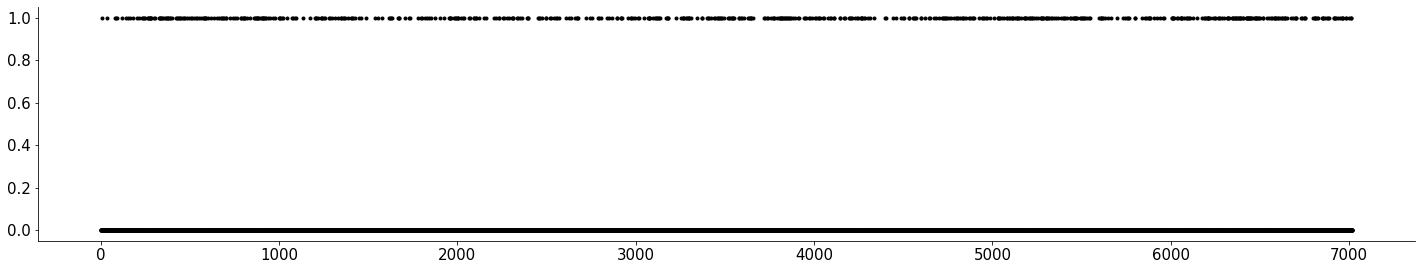

In [24]:
# @title Simple GLM

# Define events from z-scores
sresp_event = np.zeros_like(Z)
sresp_event[Z >= 1.5] = 1
print(sresp_event.shape)

plt.plot(sresp_event[0], 'k.')


(7018, 25)
(7018,)


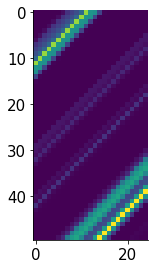

In [26]:
# @title make design matrix
stim = zscore(dat['run'], axis=0);
stim = stim[:,0]
# plt.plot(stim, 'k.-')

def make_design_matrix(stim, d=25):
  """Create time-lag design matrix from stimulus intensity vector.
  Args:
    stim (1D array): Stimulus intensity at each time point.
    d (number): Number of time lags to use.
  Returns
    X (2D array): GLM design matrix with shape T, d
  """
  # Create version of stimulus vector with zeros before onset
  padded_stim = np.concatenate([np.zeros(d - 1), stim])
  # Construct a matrix where each row has the d frames of
  # the stimulus proceeding and including timepoint t
  T = len(stim)  # Total number of timepoints
  X = np.zeros((T, d))
  for t in range(T):
      X[t] = padded_stim[t:t + d]

  return X


neuron_idx = 100
spikes = sresp_event[neuron_idx,:]

print(X.shape)
print(spikes.shape)
X = make_design_matrix(stim)
# plot_glm_matrices(X.T, spikes, nt=10)
plt.imshow(X[50:100, :])


(7018,)
(7018, 26)


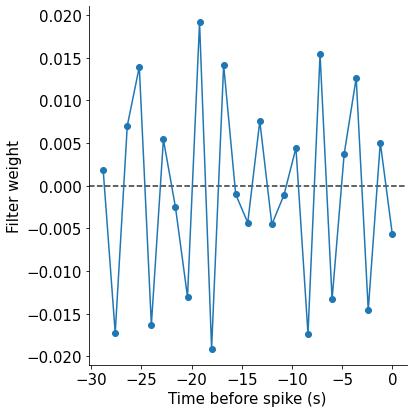

In [27]:
# @title Build the full design matrix
y = spikes
constant = np.ones_like(y)
X = np.column_stack([constant, make_design_matrix(stim)])

print(y.shape)
print(X.shape)
# Get the MLE weights for the LG model
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta_lg = theta[1:]

dt_stim = 1.2
fig = plt.figure(figsize=(6,6))
plot_spike_filter(theta_lg, dt_stim)

In [ ]:
def predict_spike_counts_lg(stim, spikes, d=25):
  """Compute a vector of predicted spike counts given the stimulus.
  Args:
    stim (1D array): Stimulus values at each timepoint
    spikes (1D array): Spike counts measured at each timepoint
    d (number): Number of time lags to use.
  Returns:
    yhat (1D array): Predicted spikes at each timepoint.
  """

  # Create the design matrix
  y = spikes
  constant = np.ones_like(y)
  X = np.column_stack([constant, make_design_matrix(stim)])

  # Get the MLE weights for the LG model
  theta = np.linalg.inv(X.T @ X) @ X.T @ y

  # Compute predicted spike counts
  yhat = X @ theta
  return yhat

predicted_counts = predict_spike_counts_lg(stim, spikes)
with plt.xkcd():
  plot_spikes_with_prediction(spikes, predicted_counts, dt_stim)